## Naive Bayes Classifier

It is a classification technique based on Bayes’ Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

## Bayes Theorem

Bayes theorem describes the `probability of occurrence of an event related to any condition`. It is also considered for the case of conditional probability. Bayes theorem is also known as the formula for the probability of `causes`.

For example: if we have to calculate the probability of taking a blue ball from the second bag out of three different bags of balls, where each bag contains three different colour balls viz. red, blue, black. In this case, the probability of occurrence of an event is calculated depending on other conditions is known as `conditional probability`.


$$P(A|B) = \frac{P(B|A).P(A)}{P(B)}$$

With class label and features

$$P(y|X) = \frac{P(X|y).P(y)}{P(X)}$$

Where y = class label

$$X = feature \ vector = \{x_1, x_2 ..... x_n\}$$

Where,

$P(y|x)$: Posterior Probability of class (`y`, target) given predictor (`x`, attributes)

$P(x|y)$: Likelihood which is the probability of the predictor given class `y`

$P(y)$: Class Prior Probabilites of class `y`

$P(x)$ : Prior Probababilites of the predictor

**Basian Assumption**
- the feature are mutually independent
- each feature have chance to predict the output class (Naive Assumption)

$$P(y|X) = \frac{P(x_1|y).P(x_2|y). ... .P(x_n|y) .P(y)}{P(X)}$$


Our goal is predict the class y given X. i.e with highest $P(y|X)$.

$$y = argmax_y P(y|X)$$

- The Prior Probability of the predictor $P(X)$ does not depends on the `y` so it is discarded.
- The product of the probabilities are very small so we convert them into the `log`

$$y=argmax_y \ log(P(x_1|y)) + log(P(x_1|y)) + ... + log(P(x_n|y)) + log(P(y))  $$



**Prior and Class Conditional**

- $P(y)$: Prior Probability => it can be calculated from the frequencies of the each class
- $P(x_i|y)$ : Class Conditional Probability => It can be computed with Gaussian Distribution


$$ P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}.exp(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2}) $$

Where,
- $\sigma$: Standard Deviation
- $\sigma^2$: Variance
- $\mu$: Mean

## Types of Naïve Bayes Classifiers

1. Multinomial Naïve Bayes Classifier
   
   Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.

2. Bernoulli Naïve Bayes Classifier:
   
   In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence (i.e. a word occurs in a document or not) features are used rather than term frequencies (i.e. frequency of a word in the document).

   This variant is useful when using discrete data, such as frequency counts, and it is typically applied within natural language processing use cases, like spam classification.

3. Gaussian Naïve Bayes Classifier:
   
   In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution). When plotted, it gives a bell-shaped curve which is symmetric about the mean of the feature values as shown below:

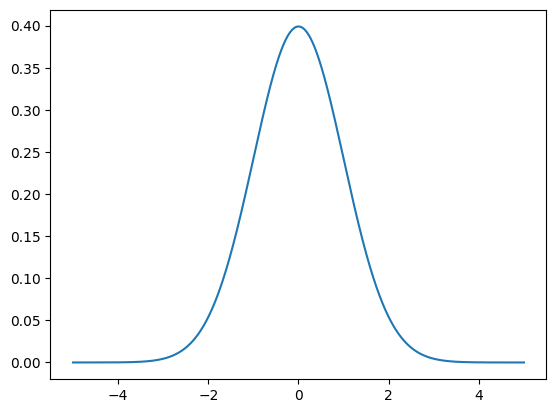

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)
## y-axis as the gaussian
y_data = sp.stats.norm.pdf(x_data, 0, 1)

## plot data
plt.plot(x_data, y_data)
plt.show()

### Advantages

- **Less complex:** Compared to other classifiers, Naïve Bayes is considered a simpler classifier since the parameters are easier to estimate. As a result, it’s one of the first algorithms learned within data science and machine learning courses.  
- **Scales well:** Compared to logistic regression, Naïve Bayes is considered a fast and efficient classifier that is fairly accurate when the conditional independence assumption holds. It also has low storage requirements.
- **Can handle high-dimensional data:** Use cases, such document classification, can have a high number of dimensions, which can be difficult for other classifiers to manage.

### Disadvantages:
- **Subject to Zero frequency:** Zero frequency occurs when a categorical variable does not exist within the training set. For example, imagine that we’re trying to find the maximum likelihood estimator for the word, “sir” given class “spam”, but the word, “sir” doesn’t exist in the training data. The probability in this case would zero, and since this classifier multiplies all the conditional probabilities together, this also means that posterior probability will be zero. To avoid this issue, laplace smoothing can be leveraged.
- **Unrealistic core assumption:** While the conditional independence assumption overall performs well, the assumption does not always hold, leading to incorrect classifications.



## Implementation of Basian Classifier


**Training**
- Calculate Mean, Variance and Prior Probability (freq. of each class) using the training set

**Prediction**
- Calculate the posterior for each class
   
  $y=argmax_y log ......$
  
  and Gaussian Formula
- Choose class with highest posterior probability

## Implementation

In [2]:
import numpy as np

**Define the class**

- define the train method
- define predict method
- calculate / evaluate model

In [3]:
class NBClassifier:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # calculate mean, var, and prior for each class
        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            # calculate posterior probability for each class
            for idx, c in enumerate(self.classes):
                prior = np.log(self.priors[idx])
                posterior = np.sum(np.log(self.pdf(idx, x)))
                posterior = posterior + prior
                posteriors.append(posterior)

            # get the class with highest posterior (np.log(self.pdf(idx, x)))
            y_pred.append(np.argmax(posteriors))
        return np.array(y_pred)


    # calculate pdf for gaussian distrubtion
    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

**Main program**

Testing of the algorithm

In [4]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("diabetes.csv")
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

**Normalize dataset**

**Normalization (min-max scaling)**

IT is a scaling technique method in which data points are shifted and rescaled so they end up in the range of 0 to 1.

$X_{new} = \frac{X — X_{min}}{X_{max} — X_{min}}$


**Standardization**

Standardization is another scaling method where the `values are centered around mean with a unit standard deviation`. It means if we will calculate mean and standard deviation of standard scores it will be 0 and 1 respectively.

The formula for standardized values:


$\frac{X-\mu}{\sigma}$

Where,

$\mu$ = mean of the given distribution

$\sigma$ = standard deviation of the given distribution

This Z is called standard score and it represents the number of standard deviations above or below the mean that a specific observation falls.

For more details:
- https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e


In [7]:
# normalize the dataset and try to evaluate again
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
X = ss.transform(X)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

**Run the algorithm and Evaluate Model**

In [11]:
nb = NBClassifier()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)

print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.6818181818181818


In [12]:
# Compare the test vs predicted result
list(zip(x_test, y_test, predictions))

[(array([-0.94866325,  1.34777163,  0.15533439, -1.17927341, -0.58694243,
          0.86774403,  2.02446472, -0.07551813]),
  1,
  1),
 (array([-0.94866325, -1.14890638, -0.61964916, -1.17927341, -0.58694243,
         -1.25635104, -0.58047733, -1.16297924]),
  0,
  0),
 (array([ 0.74016583, -1.11882592,  0.428858  ,  1.28777798, -0.19519406,
          1.68963007, -0.57237066,  0.7400777 ]),
  0,
  0),
 (array([-0.94866325, -0.33673402, -0.02701468, -0.007424  , -0.58694243,
         -0.46648654, -0.83178398, -0.89111397]),
  0,
  0),
 (array([-0.94866325,  0.98680613, -0.39171282, -1.17927341, -0.58694243,
         -0.50918192, -0.79395287, -1.07235748]),
  0,
  0),
 (array([-0.94866325, -1.35946959, -0.8475855 , -0.56251056, -0.58694243,
         -0.8400711 , -0.60749955, -1.16297924]),
  0,
  0),
 (array([ 2.99193794,  0.53559926,  0.06415986,  0.7943677 ,  0.31081424,
          0.66494099, -0.86421064,  0.83069946]),
  1,
  1),
 (array([ 0.74016583,  0.95672568, -0.11818921,  1.4111

## References

Get an idea about how Naive Bayes works:
- https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/
- https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html
- https://www.ibm.com/topics/naive-bayes